<a href="https://colab.research.google.com/github/avivg7/Face-Mask-Detection-Deep-Neural-Network-Triple-Solution/blob/main/fully_connected_for_emet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
#---------------------------The import statments-----------------------------------------

import pandas as pd                               #reading, writing and manipulating the data (using tables)
import numpy as np                                #Library for linear algebra and some probabiltity (raw data) 
import tensorflow as tf                           #library for numerical computation that makes machine learning faster and easier
from tensorflow import keras                      #we may not add this since keras is already thier in tensorflow
from tensorflow.keras.models import Sequential    #To create the sequential layer
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout  #To create the model
from tensorflow.keras.optimizers import Adam      #Adam optimizer
from keras.preprocessing import image             #used for image classification
from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve the performance and ability of the model to generalize
import matplotlib.pyplot as plt                   #library to plot graphs
from google.colab import files                    #To be able to upload files
import os

In [ ]:
# setting the batch size and the epochs
batch_size = 8
epochs = 5

In [ ]:
# moshe test data
directory_moshetest = '/content/drive/MyDrive/Colab Notebooks/Moshe_Test'

In [ ]:
# save exemple inside MosheTest
# uploaded = files.upload()
# TODO - save into directory_moshetest

In [ ]:
# upload data base from drive
directory_train = '/content/drive/MyDrive/Colab Notebooks/Train'
directory_validation = '/content/drive/MyDrive/Colab Notebooks/Validation'
directory_test = '/content/drive/MyDrive/Colab Notebooks/Test/ALL'

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.4,
                                   rescale = 1./255,            # Multiple the colors by a number between 0-1 to process data faster
                                   rotation_range=40,           #rotate the images
                                   width_shift_range=0.2,     
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')        #add new pixels when the image is rotated or shifted

In [ ]:
train_generator = train_datagen.flow_from_directory(
                                directory_train,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                seed=2020,                      # to make the result reproducible
                                subset = 'training')            # Specify this is training set

Found 6000 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
                                directory_validation,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                subset = 'validation')            # Specify this is training set

Found 320 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train_generator)

In [ ]:
#plotting function

def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

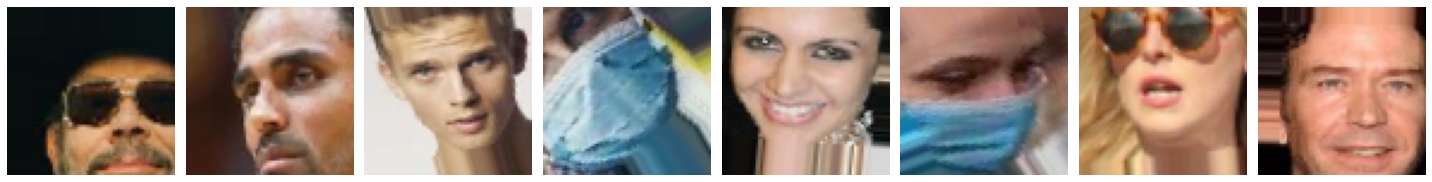

[1. 1. 1. 0. 1. 0. 1. 1.]


In [ ]:
# displaying the images and thier labels where as 0 with mask and 1 without mask
plotImages(imgs);
print(labels);

In [ ]:
# create the model layers
model = Sequential([
                    Flatten(input_shape=(70,70,3)),
                    Dense(units=64, activation= 'relu'),
                    Dense(units=1, activation='sigmoid'),

])

#check out the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 14700)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                940864    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 940,929
Trainable params: 940,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model using the **Adam** optimizer with **learning rate** of `0.0001`, a **loss** of `binary_crossentropy`, and we'll look at `accuracy` as our performance **metric**
model.compile(optimizer=Adam(learning_rate=0.6), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator ,epochs = epochs,validation_data= validation_generator)

Epoch 1/5
750/750 [==============================] - 3043s 4s/step - loss: 280.0393 - accuracy: 0.5091 - val_loss: 0.7682 - val_accuracy: 0.5000
Epoch 2/5
750/750 [==============================] - 30s 40ms/step - loss: 0.7163 - accuracy: 0.5006 - val_loss: 0.7149 - val_accuracy: 0.5000
Epoch 3/5
750/750 [==============================] - 30s 40ms/step - loss: 1.5585 - accuracy: 0.4950 - val_loss: 0.7397 - val_accuracy: 0.5000
Epoch 4/5
750/750 [==============================] - 29s 39ms/step - loss: 0.7132 - accuracy: 0.5263 - val_loss: 0.7687 - val_accuracy: 0.5000
Epoch 5/5
750/750 [==============================] - 30s 40ms/step - loss: 0.7209 - accuracy: 0.5013 - val_loss: 0.7090 - val_accuracy: 0.5000


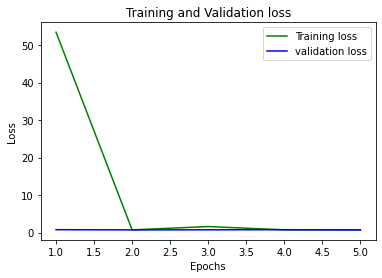

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,epochs+1)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

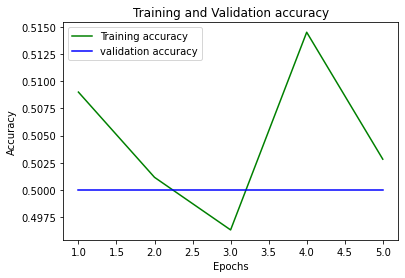

In [ ]:
#Plotting the accuracy of validation and training 
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from IPython.display import Image, display
from random import shuffle
from os import listdir

TBLUE =   '\033[1;37;44m' # Statistical information
TGREEN =  '\033[1;37;42m' # Wear mask - Model succeeded
TRED =    '\033[1;37;41m' # Model failed
TPURPLE = '\033[1;37;45m' # Not wearing mask - Model succeeded

list_of_filenames_without_mask = []
list_of_filenames_with_mask =[]
lid = listdir(directory_test)

shuffle(lid)
shuffle(lid)

directory_test = '/content/drive/MyDrive/Colab Notebooks/Test/ALLNEW' # Cheack aboud lid

for fn in listdir(directory_test):
  if fn.startswith("no_"):
    list_of_filenames_without_mask.append(fn)
  else:
    list_of_filenames_with_mask.append(fn)

print(TBLUE + "We have %d which wear a mask and %d that doesn't"%(len(list_of_filenames_with_mask),len(list_of_filenames_without_mask)))

all_test_len = len(list_of_filenames_with_mask) + len(list_of_filenames_without_mask)

success = 0

for fn in listdir(directory_test):
  ipath = directory_test + "/" + fn
  img_pred = image.load_img(ipath, target_size = (70, 70))
  img_pred = image.img_to_array(img_pred)
  img_pred = np.expand_dims(img_pred, axis = 0)
  prediction = model.predict(img_pred)

  #display(Image(ipath,width= 150, height=150))
  if (int(prediction[0][0]) == 0):
    if fn not in list_of_filenames_with_mask:     
      print(TRED + "The person is not wearing a mask but the machine thinks that he\she wears.\n")
    else: 
      print(TGREEN + "The person is wearing a mask. \n")
      success+=1
  else:
    if fn not in list_of_filenames_without_mask:     
      print(TRED + "The person is wearing a mask but the machine thinks that he\she doesn't wears\n")
    else:
      print(TPURPLE + "The person is not wearing a mask.\n")
      success+=1    

print(TBLUE + "finished")

success_rate = (success / all_test_len) * 100

print(TBLUE + f'OUR SUCCES RATE IS {success_rate}%')


OUR SUCCES RATE IS 0.9778225806451613%


In [ ]:
model.save('FC_94_model.h5')

In [ ]:
mv *.h5 "/content/drive/MyDrive/Colab Notebooks/"

In [ ]:
# Load a single image and predict the apparel class
filepath='/content/drive/MyDrive/Colab Notebooks/Moshe_Test/no_mask_6002.png'
img_pred = image.load_img(filepath, target_size = (70, 70))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
prediction = model.predict(img_pred)

if(prediction[0][0]==0):
    pred='Mask'
else:
    pred='No Mask'
  
print(pred)
print(f'prediction = {prediction[0][0]}')

No Mask
prediction = 1.0
